In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [46]:
train = pd.read_csv('treino.csv')
test = pd.read_csv('teste.csv')

In [47]:
train.corr()['cost'].sort_values(ascending=False)

cost                          1.000000
avg_cars_at home(approx).1    0.027098
units_per_case                0.000180
gross_weight                 -0.000116
id                           -0.000611
recyclable_package           -0.001455
num_children_at_home         -0.001727
low_fat                      -0.001975
total_children               -0.007482
store_sales(in millions)     -0.012387
unit_sales(in millions)      -0.026509
store_sqft                   -0.049201
coffee_bar                   -0.052086
salad_bar                    -0.098810
prepared_food                -0.098843
video_store                  -0.106786
florist                      -0.110414
Name: cost, dtype: float64

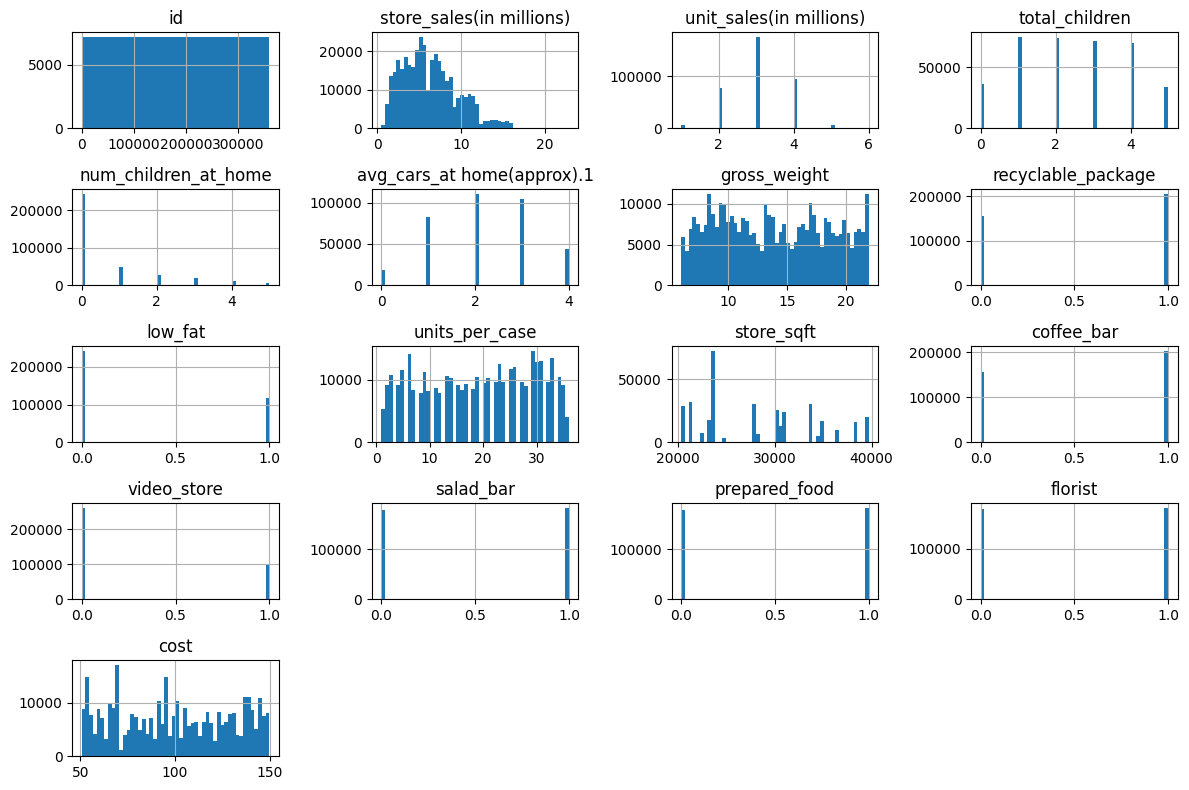

In [48]:
train.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [49]:
test

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240219,600555,8.60,4.0,0.0,0.0,1.0,8.39,0.0,0.0,16.0,38382.0,0.0,0.0,0.0,0.0,0.0
240220,600556,4.30,2.0,2.0,0.0,4.0,7.88,1.0,0.0,4.0,30268.0,0.0,0.0,0.0,0.0,0.0
240221,600557,6.30,3.0,0.0,0.0,3.0,11.50,0.0,0.0,13.0,39696.0,0.0,0.0,1.0,1.0,0.0
240222,600558,7.94,2.0,0.0,0.0,2.0,8.33,1.0,0.0,8.0,23759.0,1.0,0.0,1.0,1.0,1.0


In [50]:
all_data = pd.concat(
    (train.loc[:,'store_sales(in millions)':'florist'],
     test.loc[:,'store_sales(in millions)':'florist']))

In [52]:
all_data['recyclable_package'] = all_data['recyclable_package'].astype(object)

In [53]:
all_data['low_fat'] = all_data['low_fat'].astype(object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600560 entries, 0 to 240223
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store_sales(in millions)    600560 non-null  float64
 1   unit_sales(in millions)     600560 non-null  float64
 2   total_children              600560 non-null  float64
 3   num_children_at_home        600560 non-null  float64
 4   avg_cars_at home(approx).1  600560 non-null  float64
 5   gross_weight                600560 non-null  float64
 6   recyclable_package          600560 non-null  object 
 7   low_fat                     600560 non-null  float64
 8   units_per_case              600560 non-null  float64
 9   store_sqft                  600560 non-null  float64
 10  coffee_bar                  600560 non-null  float64
 11  video_store                 600560 non-null  float64
 12  salad_bar                   600560 non-null  float64
 13  prepared_food 

In [54]:
all_data['low_fat'] = all_data['low_fat'].astype(object)

In [55]:
all_data['coffee_bar'] = all_data['coffee_bar'].astype(object)

In [56]:
all_data['video_store'] = all_data['video_store'].astype(object)

In [57]:
all_data['salad_bar'] = all_data['salad_bar'].astype(object)

In [58]:
all_data['prepared_food'] = all_data['prepared_food'].astype(object)

In [59]:
all_data['florist'] = all_data['florist'].astype(object)

In [67]:
numerical_columns = []
categorical_columns = []
for col in all_data.columns:
    if all_data[col].dtypes == 'object':
        categorical_columns += [col]
    else:
        numerical_columns += [col]

In [70]:
dummies = pd.get_dummies(all_data[categorical_columns],drop_first=True)
dummies

C:\Users\artur\AppData\Local\Temp\ipykernel_280\3866191699.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(all_data[categorical_columns],drop_first=True)
C:\Users\artur\AppData\Local\Temp\ipykernel_280\3866191699.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(all_data[categorical_columns],drop_first=True)
C:\Users\artur\AppData\Local\Temp\ipykernel_280\3866191699.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(all_data[categorical_columns],drop_first=True)
C:\Users\artur\AppData\Local\Temp\ipykernel_280\3866191699.py:1: FutureWarning: In a future version, the Index constructor will not i

,recyclable_package_1.0,low_fat_1.0,coffee_bar_1.0,video_store_1.0,salad_bar_1.0,prepared_food_1.0,florist_1.0
0,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0
2,1,0,1,0,0,0,0
3,0,1,1,0,0,0,0
4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
240219,0,0,0,0,0,0,0
240220,1,0,0,0,0,0,0
240221,0,0,0,0,1,1,0
240222,1,0,1,0,1,1,1


In [72]:
all_data = all_data.drop(categorical_columns,axis=1)

In [74]:
all_data = pd.concat([all_data,dummies],axis=1)
all_data

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,units_per_case,store_sqft,recyclable_package_1.0,low_fat_1.0,coffee_bar_1.0,video_store_1.0,salad_bar_1.0,prepared_food_1.0,florist_1.0
0,8.61,3.0,2.0,2.0,2.0,10.30,32.0,36509.0,1,0,0,0,0,0,0
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,28206.0,1,0,1,0,0,0,0
2,14.08,4.0,0.0,0.0,3.0,21.30,26.0,21215.0,1,0,1,0,0,0,0
3,4.02,3.0,5.0,0.0,0.0,14.80,36.0,21215.0,0,1,1,0,0,0,0
4,2.13,3.0,5.0,0.0,3.0,17.00,20.0,27694.0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240219,8.60,4.0,0.0,0.0,1.0,8.39,16.0,38382.0,0,0,0,0,0,0,0
240220,4.30,2.0,2.0,0.0,4.0,7.88,4.0,30268.0,1,0,0,0,0,0,0
240221,6.30,3.0,0.0,0.0,3.0,11.50,13.0,39696.0,0,0,0,0,1,1,0
240222,7.94,2.0,0.0,0.0,2.0,8.33,8.0,23759.0,1,0,1,0,1,1,1


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [76]:
model = LinearRegression()

In [85]:
X = all_data[:train.shape[0]]
test = all_data[train.shape[0]:]
y = np.log1p(train['cost'][:train.shape[0]])

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
model.fit(X_train,y_train)

LinearRegression()

In [87]:
model.score(X_test,y_test)

0.02191899823018084

In [88]:
model.predict(test)

array([4.61424013, 4.5509347 , 4.57809885, ..., 4.57876537, 4.57639272,
       4.62681218])

In [89]:
gender_submission = pd.read_csv('submissao.csv')

In [90]:
gender_submission['cost'] = np.expm1(model.predict(test))

In [91]:
gender_submission.to_csv('cost',index=0)